In [1]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
image = cv2.imread("/home/jiwon/workspace/img_dataset/LensCalibrated/52.png")
output = image.copy()
height, width = image.shape[:2]
maxRadius = int(1.1 * (width / 100) / 2) # hardcoded
minRadius = int(0.9 * (width / 140) / 2) # hardcoded

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
circles = cv2.HoughCircles(image=gray, 
                           method=cv2.HOUGH_GRADIENT, 
                           dp=1.2, 
                           minDist=2*minRadius,
                           param1=50,
                           param2=50,
                           minRadius=minRadius,
                           maxRadius=maxRadius                           
                          )

Detected Marker Centers: 6


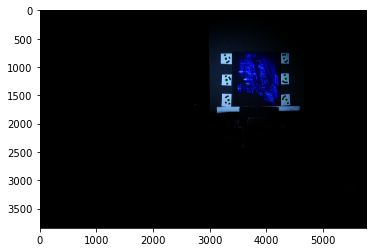

In [3]:
if circles is not None:
    # convert the (x, y) coordinates and radius of the circles to integers
    circlesRound = np.round(circles[0, :]).astype("int")
    # loop over the (x, y) coordinates and radius of the circles
    for (x, y, r) in circlesRound:
        cv2.circle(output, (x, y), r, (0, 255, 0), 4)
        cv2.circle(output, (x, y), radius=2, color=(0, 0, 255), thickness=2)
    
    print("Detected Marker Centers:", len(circlesRound))
    cv2.imwrite("circle_detected.png", output)
    plt.imshow(output)
    plt.show()

(3395, 1690)
(4240, 1690)
(3395, 737)
(4240, 737)
[[4341 1579   23]
 [3275  857   22]
 [3285 1232   23]
 [3320 1585   22]
 [4327 1210   23]
 [4301  853   23]]
[0 3 0]


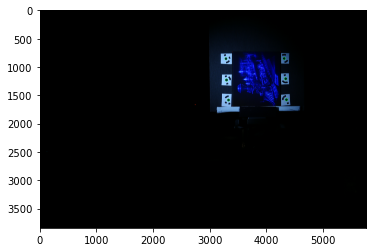

In [4]:
if circles is not None:
    image = cv2.imread("./circle_detected.png")
    output = image.copy()
    # numpy argmin/argmax reference: https://stackoverflow.com/a/51055927
    lower_left = np.argmax(circlesRound, axis=0)[1]
    cv2.circle(output, (circlesRound[lower_left][0] + 75, circlesRound[lower_left][1] + 105),
        radius=2, color=(255, 0, 0), thickness=2) # offset hardcoded
    print((circlesRound[lower_left][0] + 75, circlesRound[lower_left][1] + 105))
    
    lower_right = np.argmax(circlesRound, axis=0)[0]
    cv2.circle(output, (circlesRound[lower_left][0] + 920, circlesRound[lower_left][1] + 105),
        radius=2, color=(255, 0, 0), thickness=2) # offset hardcoded
    print((circlesRound[lower_left][0] + 920, circlesRound[lower_left][1] + 105))
    lower_right_x = circlesRound[lower_left][0] + 920
    lower_right_y = circlesRound[lower_left][1] + 105

    upper_left = np.argmin(circlesRound, axis=0)[0]
    cv2.circle(output, (circlesRound[lower_left][0] + 75, circlesRound[upper_left][1] - 120),
        radius=2, color=(255, 0, 0), thickness=2) # offset hardcoded
    print((circlesRound[lower_left][0] + 75, circlesRound[upper_left][1] - 120))
    upper_left_x = circlesRound[lower_left][0] + 75
    upper_left_y = circlesRound[upper_left][1] - 120

    # upper_right = np.argmin(circlesRound, axis=0)[1]
    cv2.circle(output, (circlesRound[lower_left][0] + 920, circlesRound[upper_left][1] - 120),
        radius=2, color=(255, 0, 0), thickness=2) # offset hardcoded
    print((circlesRound[lower_left][0] + 920, circlesRound[upper_left][1] - 120))
    
    print(circlesRound)
    print(np.argmax(circlesRound, axis=0))
    cv2.imwrite("corners_calculated.png", output)
    plt.imshow(output)
    plt.show()

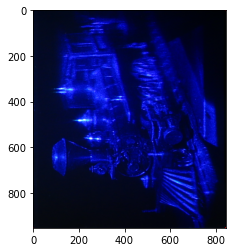

In [5]:
'''
Using corner-marked images will display the 4 corners, but will be removed in the actual preprocessing.
'''
image = cv2.imread("./corners_calculated.png")
output = image.copy()
# img crop reference: https://stackoverflow.com/a/54885575
output = output[upper_left_y : lower_right_y + 1, upper_left_x : lower_right_x + 1]
cv2.imwrite("cropped.png", output)
plt.imshow(output)
plt.show()

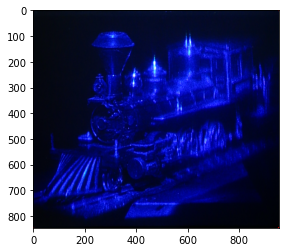

In [6]:
image = cv2.imread("./cropped.png")
output = image.copy()
# rotate 270 by rotating 90 by 3 times
rotated = np.rot90(output)
rotated = np.rot90(rotated)
rotated = np.rot90(rotated)
cv2.imwrite("rotated.png", rotated)
plt.imshow(rotated)
plt.show()